In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
DATA_PATH = '{}/data/json'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [7]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2
from scripts.text.article_text_processor import ArticleTextProcessor
from scripts.text.teams_players import TeamPlayers
import scripts.utils.visualizations as vis_utils
%reload_ext autoreload

# Procesamiento de noticias y eventos

## Ejemplo

In [25]:
processor = ArticleTextProcessor()

In [36]:
all_files = processor.load_json()

In [37]:
article_dict = all_files['premier_league_2019_2020.json']['http://www.premierleague.com/match/46975']

In [38]:
article_dict['article']

"Watford were relegated from the Premier League after losing 3-2 to Arsenal as Pierre-Emerick Aubameyang's brace was not enough in the race for the Golden Boot.\nAubameyang opened the scoring in the fifth minute from the penalty spot after a Video Assistant Referee review of Craig Dawson's foul on Alexandre Lacazette.\nArsenal doubled their advantage on 24 minutes through Kieran Tierney's first goal for the club.\xa0\nIt was 3-0 on 33 minutes, Aubameyang producing an overhead kick into the net.\nWatford pulled one back 10 minutes later, Troy Deeney converting a penalty after Danny Welbeck had been fouled by David Luiz.\nWelbeck fired in from Ismaila Sarr's cross to make it 3-2 in the 66th minute before Emiliano Martinez denied the former Arsenal forward an equaliser.\nArsenal rise two places to eighth on 56 points, while\xa0Watford go down in 19th with 34 points.\xa0\nSee: Arsenal report |\xa0Watford report"

In [49]:
article_dict['events']

['Penalty conceded by Craig Dawson (Watford) after a foul in the penalty area.',
 'Penalty Arsenal. Alexandre Lacazette draws a foul in the penalty area.',
 'VAR Decision: Penalty Arsenal.',
 'Goal!   Arsenal 1, Watford 0. Pierre-Emerick Aubameyang (Arsenal) converts the penalty with a right footed shot to the bottom left corner.',
 'Attempt missed. Danny Welbeck (Watford) left footed shot from the left side of the box is high and wide to the left. Assisted by Adam Masina.',
 'Attempt saved. Ismaila Sarr (Watford) right footed shot from the centre of the box is saved in the centre of the goal. Assisted by Abdoulaye Doucouré with a cross.',
 'Troy Deeney (Watford) wins a free kick in the defensive half.',
 'Foul by Dani Ceballos (Arsenal).',
 'Corner,  Watford. Conceded by Kieran Tierney.',
 'Granit Xhaka (Arsenal) wins a free kick in the defensive half.',
 'Foul by Christian Kabasele (Watford).',
 'Attempt blocked. Pierre-Emerick Aubameyang (Arsenal) right footed shot from outside the 

## Total

In [5]:
path_articles_events = f'{MAIN_PATH}/data/csv/articles_events.csv'

In [8]:
article_events_df = pd.read_csv(path_articles_events)

In [9]:
article_events_df

,json_file,url,article,events,league,season
0,premier_league_2018_2019.json,http://www.premierleague.com/match/38678,A goal and an assist from Riyad Mahrez sealed ...,Attempt blocked. Ilkay Gündogan (Manchester Ci...,premier_league,2018_2019
1,premier_league_2018_2019.json,http://www.premierleague.com/match/38679,A second-half double by Pierre-Emerick Aubamey...,Hand ball by Tom Heaton (Burnley). Yellow Card...,premier_league,2018_2019
2,premier_league_2018_2019.json,http://www.premierleague.com/match/38680,Michy Batshuayi's brace helped Crystal Palace ...,Andros Townsend (Crystal Palace) wins a free k...,premier_league,2018_2019
3,premier_league_2018_2019.json,http://www.premierleague.com/match/38681,Fulham were overpowered by an impressive Newca...,Attempt missed. Jonjo Shelvey (Newcastle Unite...,premier_league,2018_2019
4,premier_league_2018_2019.json,http://www.premierleague.com/match/38682,Chelsea confirmed a third-place finish after a...,Foul by Jorginho (Chelsea). Jamie Vardy (Leice...,premier_league,2018_2019
...,...,...,...,...,...,...
4518,italian_serie_a_2018_2019.json,https://www.espn.com/soccer/report?gameId=522712,Inter Milan notched their seventh successive S...,"Corner, Inter Milan. Conceded by Cristian Rom...",italian_serie_a,2018_2019
4519,italian_serie_a_2018_2019.json,https://www.espn.com/soccer/report?gameId=522672,Two goals from Arkadiusz Milik helped Napoli m...,"Offside, Napoli. Elseid Hysaj tries a through ...",italian_serie_a,2018_2019
4520,italian_serie_a_2018_2019.json,https://www.espn.com/soccer/report?gameId=522701,Inter Milan's run of seven successive league w...,Attempt blocked. Hans Hateboer (Atalanta) head...,italian_serie_a,2018_2019
4521,italian_serie_a_2018_2019.json,https://www.espn.com/soccer/report?gameId=522667,Inter Milan rebounded from the disappointment ...,"Corner, Inter Milan. Conceded by Bram Nuytinc...",italian_serie_a,2018_2019


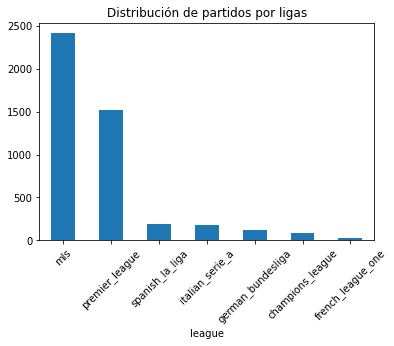

In [23]:
fig, ax = plt.subplots()
article_events_df.groupby('league').agg({'season': 'count'}).sort_values('season', ascending=False).plot.bar(ax=ax)
plt.title('Distribución de partidos por ligas')
plt.xticks(rotation=45)
plt.gca().get_legend().remove()
plt.show()

In [19]:
article_events_df.groupby('league').agg({'season': 'count'}).sort_values('season', ascending=False)

,season
league,
mls,2413
premier_league,1519
spanish_la_liga,185
italian_serie_a,180
german_bundesliga,119
champions_league,83
french_league_one,24


In [15]:
article_events_df.groupby('league').agg({'season': 'count'})

,season
league,
champions_league,83
french_league_one,24
german_bundesliga,119
italian_serie_a,180
mls,2413
premier_league,1519
spanish_la_liga,185


## Estadísticas básicas

En primer lugar, calculamos una serie de estádisticas básicas de los textos (número de palabras, número de frases y vocabulario)

In [28]:
events_df, article_df = processor.text_stats()

In [7]:
league_events_df, league_article_df = processor.text_stats_leagues()

### Eventos

- El conjunto de eventos tiene un vocabulario (palabras únicas sin procesamiento) de longitud 7009.
- La media de eventos por partido es de unos 94 eventos, prácticamente igual que la mediana
- Hay 4523 partidos en total
- Hay partidos con un solo evento
- La media de palabras totales en los eventos de un partido es de 1137, y la mediana 1135.
- En media, los eventos tienen un total de 12 palabras

In [26]:
%%time
article_vocab = processor.get_vocabulary(text_type='events')

CPU times: user 2.4 ms, sys: 500 µs, total: 2.9 ms
Wall time: 86.6 ms


In [14]:
len(article_vocab)

7009

In [29]:
events_df

,url,n_sents,n_tokens,vocab,json_file,league,tokens_per_sent
0,http://www.premierleague.com/match/38678,83,1163,115,premier_league_2018_2019.json,premier,14.012048
1,http://www.premierleague.com/match/38679,86,1150,132,premier_league_2018_2019.json,premier,13.372093
2,http://www.premierleague.com/match/38680,96,1279,131,premier_league_2018_2019.json,premier,13.322917
3,http://www.premierleague.com/match/38681,77,1021,130,premier_league_2018_2019.json,premier,13.259740
4,http://www.premierleague.com/match/38682,82,995,122,premier_league_2018_2019.json,premier,12.134146
...,...,...,...,...,...,...,...
4518,https://www.espn.com/soccer/report?gameId=522712,108,1204,124,italian_serie_a_2018_2019.json,italy,11.148148
4519,https://www.espn.com/soccer/report?gameId=522672,88,1117,125,italian_serie_a_2018_2019.json,italy,12.693182
4520,https://www.espn.com/soccer/report?gameId=522701,109,1229,125,italian_serie_a_2018_2019.json,italy,11.275229
4521,https://www.espn.com/soccer/report?gameId=522667,89,1099,131,italian_serie_a_2018_2019.json,italy,12.348315


In [13]:
events_df.drop(['url', 'json_file'], axis=1).describe()

,n_sents,n_tokens,vocab,tokens_per_sent
count,4523.000000,4523.000000,4523.000000,4523.000000
mean,93.698872,1137.646474,120.572187,12.134755
std,16.368624,208.850573,12.087192,1.257171
min,1.000000,3.000000,3.000000,2.500000
25%,84.000000,1013.000000,115.000000,11.409639
50%,94.000000,1135.000000,121.000000,12.147368
75%,103.000000,1265.000000,127.000000,12.895338
max,176.000000,2095.000000,166.000000,16.247059


In [11]:
num_cols = ['n_sents', 'n_tokens', 'tokens_per_sent', 'vocab']

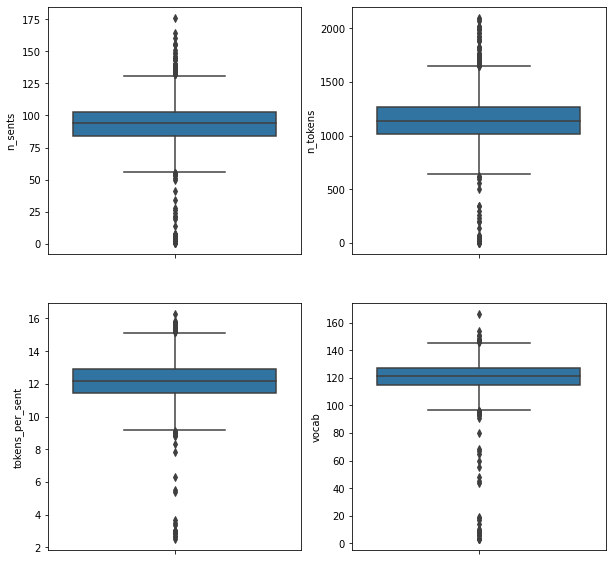

In [38]:
vis_utils.multiple_boxplot(events_df, num_cols, ncols=2)

Si analizamos por fichero, suponiendo que los eventos de un mismo fichero deberían ser parecidos (mismo periódico y mismo año de publicación):
- Parece el número medio de eventos varía entre 90 y 110, habiendo partidos en los artículos de la MLS con un solo evento
- Los partidos de la BBC (french, german, italian, spanish) parece que tienen más eventos que los de la premier y mls (dos fuentes distintas), y por lo tanto
más tokens.

In [27]:
events_df['json_file'] = events_df['json_file'].apply(lambda x: x.split('.')[0])

In [28]:
ordered_files = sorted(events_df['json_file'].unique())

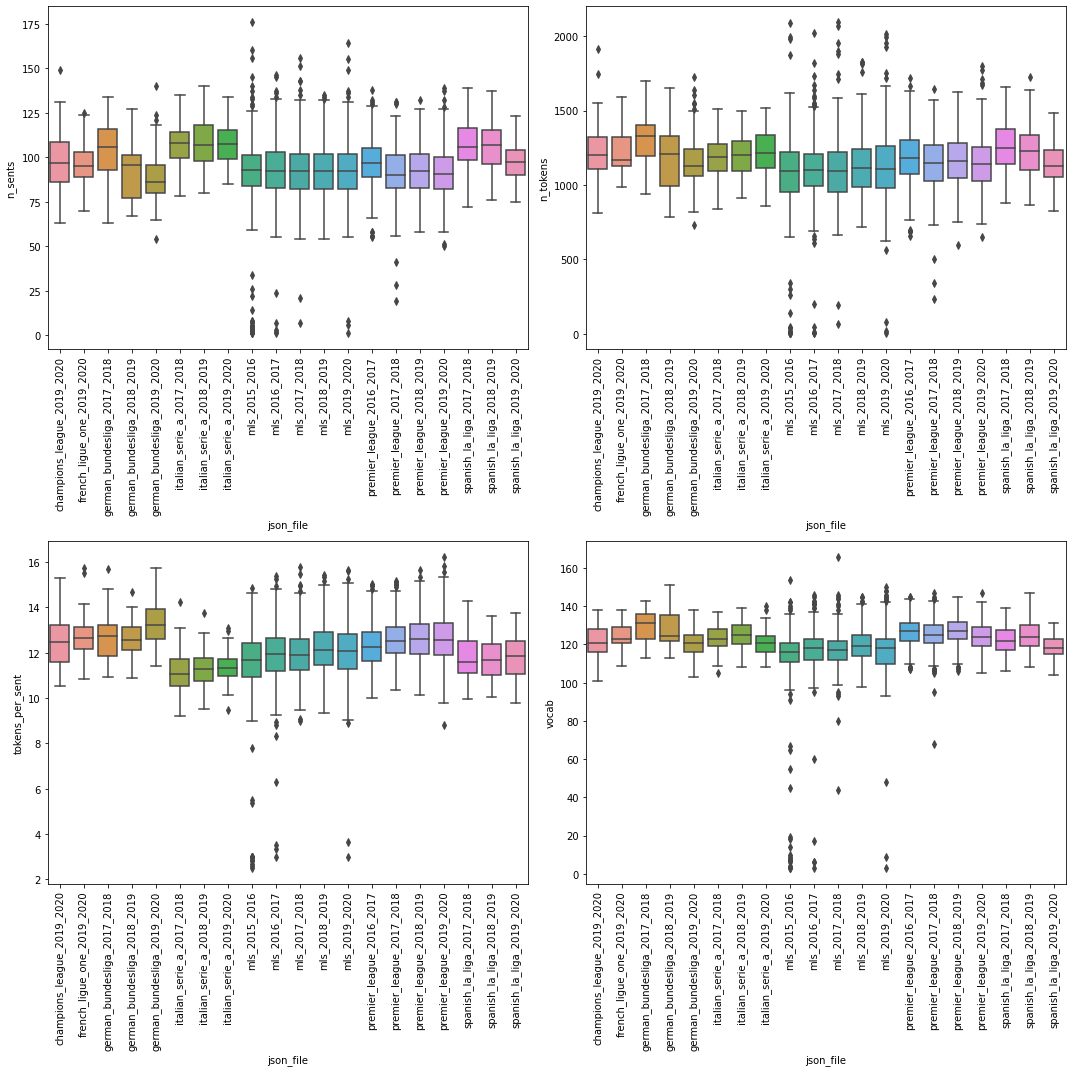

In [30]:
vis_utils.multiple_boxplot(events_df, num_cols, x='json_file', ncols=2, order=ordered_files, height=15, width=15)

In [ ]:
pd_events_group = events_df.drop('url', axis=1).groupby('json_file').describe()

In [10]:
pd_events_group['n_sents']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020.json,83.0,97.602410,15.461944,63.0,86.00,97.0,108.50,149.0
french_ligue_one_2019_2020.json,24.0,97.541667,13.574206,70.0,88.75,95.0,103.00,125.0
german_bundesliga_2017_2018.json,37.0,104.216216,17.673167,63.0,93.00,106.0,116.00,134.0
german_bundesliga_2018_2019.json,36.0,92.750000,17.175356,67.0,77.00,95.5,101.00,127.0
german_bundesliga_2019_2020.json,46.0,89.413043,17.030138,54.0,80.00,86.0,95.75,140.0
italian_serie_a_2017_2018.json,56.0,106.642857,11.620403,78.0,99.50,108.0,114.00,135.0
italian_serie_a_2018_2019.json,60.0,106.550000,13.349824,80.0,97.75,107.0,118.00,140.0
italian_serie_a_2019_2020.json,64.0,107.453125,11.818642,85.0,98.75,107.5,115.25,134.0
mls_2015_2016.json,437.0,90.377574,22.731515,1.0,84.00,93.0,101.00,176.0


In [11]:
pd_events_group['n_tokens']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020.json,83.0,1215.180723,194.710739,810.0,1106.00,1203.0,1320.00,1913.0
french_ligue_one_2019_2020.json,24.0,1236.000000,155.232224,987.0,1130.25,1171.0,1324.00,1590.0
german_bundesliga_2017_2018.json,37.0,1309.270270,167.513789,941.0,1197.00,1331.0,1404.00,1696.0
german_bundesliga_2018_2019.json,36.0,1171.888889,213.562273,782.0,992.50,1210.5,1328.00,1649.0
german_bundesliga_2019_2020.json,46.0,1183.369565,214.694342,732.0,1059.25,1129.5,1239.50,1723.0
italian_serie_a_2017_2018.json,56.0,1193.392857,143.830921,839.0,1094.00,1188.0,1274.50,1512.0
italian_serie_a_2018_2019.json,60.0,1199.500000,139.578603,912.0,1092.75,1203.5,1296.25,1498.0
italian_serie_a_2019_2020.json,64.0,1220.890625,145.175440,862.0,1113.25,1214.0,1337.50,1519.0
mls_2015_2016.json,437.0,1063.196796,288.385315,3.0,950.00,1092.0,1219.00,2089.0


In [14]:
pd_events_group['tokens_per_sent']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020.json,83.0,12.492514,1.062646,10.546296,11.585590,12.468468,13.216944,15.292683
french_ligue_one_2019_2020.json,24.0,12.748538,1.207124,10.846154,12.171817,12.633585,13.144835,15.753086
german_bundesliga_2017_2018.json,37.0,12.697900,1.118828,10.928000,11.852174,12.751880,13.231481,15.698413
german_bundesliga_2018_2019.json,36.0,12.665103,0.870473,10.906977,12.106090,12.571157,13.121368,14.671429
german_bundesliga_2019_2020.json,46.0,13.287417,0.963599,11.413223,12.626042,13.212045,13.951450,15.724638
italian_serie_a_2017_2018.json,56.0,11.218639,0.995245,9.200000,10.550086,11.058352,11.720413,14.264151
italian_serie_a_2018_2019.json,60.0,11.299131,0.838423,9.500000,10.740741,11.288152,11.772083,13.756098
italian_serie_a_2019_2020.json,64.0,11.372109,0.736763,9.483871,10.965238,11.319426,11.748229,13.098039
mls_2015_2016.json,437.0,11.495711,1.876920,2.500000,10.932584,11.693333,12.438776,14.872180


__Por liga__

También podemos agregar por liga (aquí mezclando años, y por tanto las formas de publicar pueden cambiar)

In [17]:
ordered_files = sorted(events_df['league'].unique())

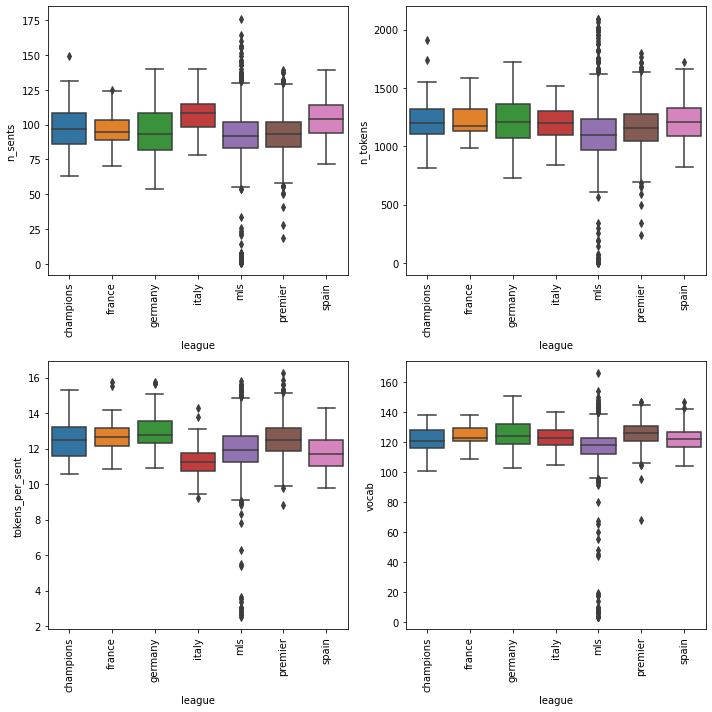

In [18]:
vis_utils.multiple_boxplot(events_df, num_cols, x='league', ncols=2, order=ordered_files)

Si observamos el vocabulario, parece que los partidos de la MLS ofrecen una mayor variedad de palabras, en comparación con los demás.

In [25]:
league_events_df

,league,vocab
0,champions,1169
1,france,605
2,germany,1073
3,italy,1122
4,mls,4161
5,premier,1591
6,spain,1052


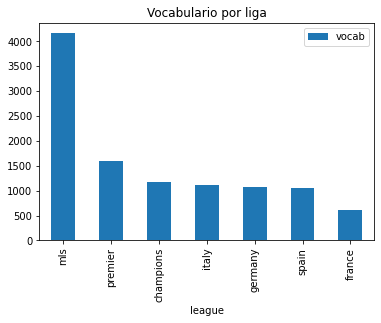

In [24]:
_, ax = plt.subplots()
league_events_df.set_index('league').sort_values('vocab', ascending=False).plot.bar(ax=ax)
plt.title('Vocabulario por liga')
plt.show()

### Artículos

- El conjunto de artículos tiene un vocabulario (palabras únicas sin procesamiento) de longitud 17929. Como era de esperar, es mucho mayor que el de los eventos.
- La homogeneidad que presentaban los eventos de cada partido no se encuentra en los artículos.
- El número medio de frases por artículo es 11, mientras que la mediana es 9.
- Hay artículos con una sola frase
- La media de palabras totales en un artículo es de 216, y la mediana 154.
- En media, las frases de un artículo tienen un total de 19 palabras

In [31]:
%%time
article_vocab = processor.get_vocabulary(text_type='article')

CPU times: user 2.34 ms, sys: 3.4 ms, total: 5.74 ms
Wall time: 72.4 ms


In [32]:
len(article_vocab)

17929

In [51]:
article_df

,url,n_sents,n_tokens,vocab,json_file,league,tokens_per_sent
0,http://www.premierleague.com/match/38678,6,128,93,premier_league_2018_2019.json,premier,21.333333
1,http://www.premierleague.com/match/38679,8,140,88,premier_league_2018_2019.json,premier,17.500000
2,http://www.premierleague.com/match/38680,7,110,76,premier_league_2018_2019.json,premier,15.714286
3,http://www.premierleague.com/match/38681,6,126,102,premier_league_2018_2019.json,premier,21.000000
4,http://www.premierleague.com/match/38682,5,75,64,premier_league_2018_2019.json,premier,15.000000
...,...,...,...,...,...,...,...
55,https://www.espn.com/soccer/report?gameId=522712,11,280,175,italian_serie_a_2018_2019.json,italy,25.454545
56,https://www.espn.com/soccer/report?gameId=522672,8,228,133,italian_serie_a_2018_2019.json,italy,28.500000
57,https://www.espn.com/soccer/report?gameId=522701,16,318,197,italian_serie_a_2018_2019.json,italy,19.875000
58,https://www.espn.com/soccer/report?gameId=522667,21,378,208,italian_serie_a_2018_2019.json,italy,18.000000


In [52]:
article_df.drop(['url', 'json_file'], axis=1).describe()

,n_sents,n_tokens,vocab,tokens_per_sent
count,4523.000000,4523.000000,4523.000000,4523.000000
mean,11.242538,216.061464,130.794384,19.792944
std,9.501215,182.358234,79.044620,5.723218
min,1.000000,6.000000,6.000000,5.961538
25%,7.000000,122.000000,88.000000,15.381944
50%,9.000000,154.000000,105.000000,19.000000
75%,12.000000,235.000000,147.000000,23.388889
max,129.000000,2382.000000,1063.000000,50.500000


In [53]:
num_cols = ['n_sents', 'n_tokens', 'tokens_per_sent', 'vocab']

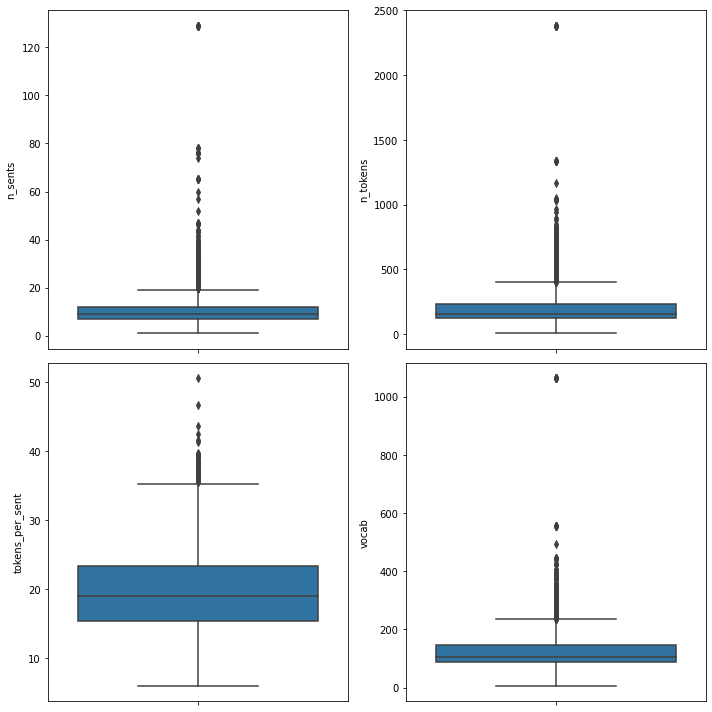

In [54]:
vis_utils.multiple_boxplot(article_df, num_cols, ncols=2)

Si analizamos por fichero, suponiendo que los eventos de un mismo fichero deberían ser parecidos (mismo periódico y mismo año de publicación):
- Hay gran variedad. Destaca que los artículos de la premier son más cortos
- Dentro de los artículos de la champions es donde más variedad hay

In [55]:
article_df['json_file'] = article_df['json_file'].apply(lambda x: x.split('.')[0])

In [56]:
ordered_files = sorted(article_df['json_file'].unique())

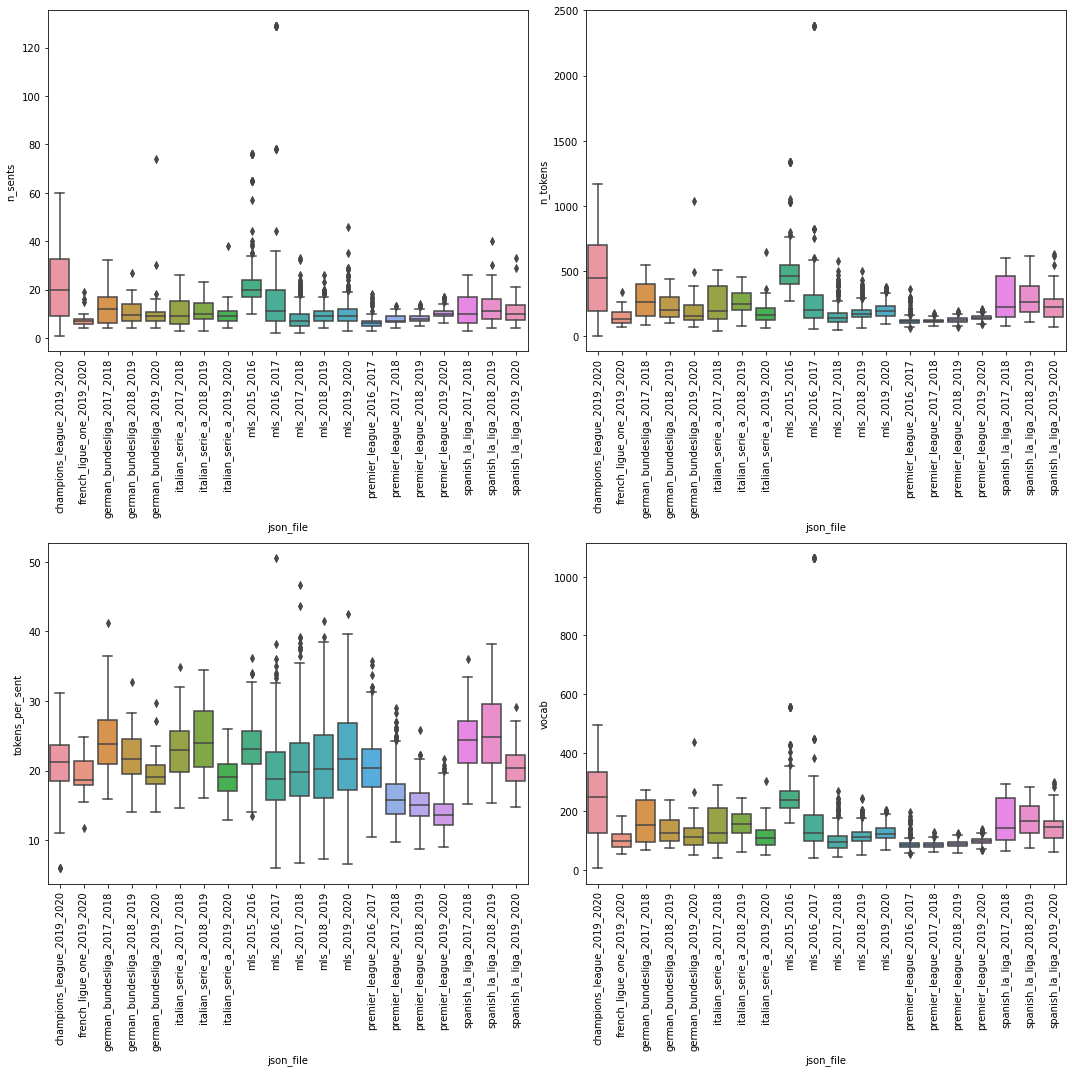

In [57]:
vis_utils.multiple_boxplot(article_df, num_cols, x='json_file', ncols=2, order=ordered_files, height=15, width=15)

In [59]:
pd_article_group = article_df.drop('url', axis=1).groupby('json_file').describe()

In [60]:
pd_article_group['n_sents']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020,83.0,21.144578,14.136212,1.0,9.00,20.0,32.50,60.0
french_ligue_one_2019_2020,24.0,7.875000,3.802888,4.0,5.75,7.0,8.00,19.0
german_bundesliga_2017_2018,37.0,11.972973,6.922132,4.0,6.00,12.0,17.00,32.0
german_bundesliga_2018_2019,36.0,10.750000,5.266471,4.0,7.00,9.5,14.00,27.0
german_bundesliga_2019_2020,46.0,10.717391,10.481016,4.0,7.00,9.0,10.75,74.0
italian_serie_a_2017_2018,56.0,10.785714,6.145846,3.0,5.75,9.0,15.25,26.0
italian_serie_a_2018_2019,60.0,11.516667,5.146964,3.0,8.00,10.0,14.50,23.0
italian_serie_a_2019_2020,64.0,9.421875,4.706647,4.0,7.00,9.0,11.00,38.0
mls_2015_2016,437.0,22.430206,10.934660,10.0,17.00,20.0,24.00,76.0


In [61]:
pd_article_group['n_tokens']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020,83.0,447.734940,289.448386,6.0,195.00,447.0,700.00,1167.0
french_ligue_one_2019_2020,24.0,150.541667,68.110511,70.0,104.25,134.0,182.75,343.0
german_bundesliga_2017_2018,37.0,284.648649,147.742121,83.0,152.00,260.0,403.00,544.0
german_bundesliga_2018_2019,36.0,225.138889,94.951462,104.0,148.75,204.5,302.00,443.0
german_bundesliga_2019_2020,46.0,202.152174,153.359124,69.0,124.50,158.0,237.75,1035.0
italian_serie_a_2017_2018,56.0,247.535714,141.895604,44.0,135.50,197.5,383.25,508.0
italian_serie_a_2018_2019,60.0,265.516667,91.883030,77.0,201.25,249.0,329.25,456.0
italian_serie_a_2019_2020,64.0,180.500000,89.881403,65.0,123.50,159.5,217.75,646.0
mls_2015_2016,437.0,501.544622,173.796322,274.0,400.00,463.0,548.00,1339.0


In [62]:
pd_article_group['tokens_per_sent']

,count,mean,std,min,25%,50%,75%,max
json_file,,,,,,,,
champions_league_2019_2020,83.0,20.546784,5.082664,6.000000,18.457143,21.272727,23.657143,31.100000
french_ligue_one_2019_2020,24.0,19.280963,2.750088,11.714286,17.916667,18.583333,21.350000,24.750000
german_bundesliga_2017_2018,37.0,24.952344,5.510664,15.968750,21.000000,23.800000,27.333333,41.250000
german_bundesliga_2018_2019,36.0,21.865926,3.869772,14.037037,19.500000,21.656250,24.489583,32.750000
german_bundesliga_2019_2020,46.0,19.433142,2.970918,13.986486,18.000000,19.069444,20.801282,29.769231
italian_serie_a_2017_2018,56.0,22.985939,4.404749,14.666667,19.729167,23.023810,25.733333,34.928571
italian_serie_a_2018_2019,60.0,24.411569,4.684820,16.083333,20.452941,23.892857,28.541667,34.500000
italian_serie_a_2019_2020,64.0,19.082970,2.927211,12.888889,17.000000,19.133929,20.942308,26.000000
mls_2015_2016,437.0,23.318108,3.908612,13.421053,20.880000,23.142857,25.666667,36.125000


__Por liga__

También podemos agregar por liga (aquí mezclando años, y por tanto las formas de publicar pueden cambiar)

In [64]:
ordered_files = sorted(article_df['league'].unique())

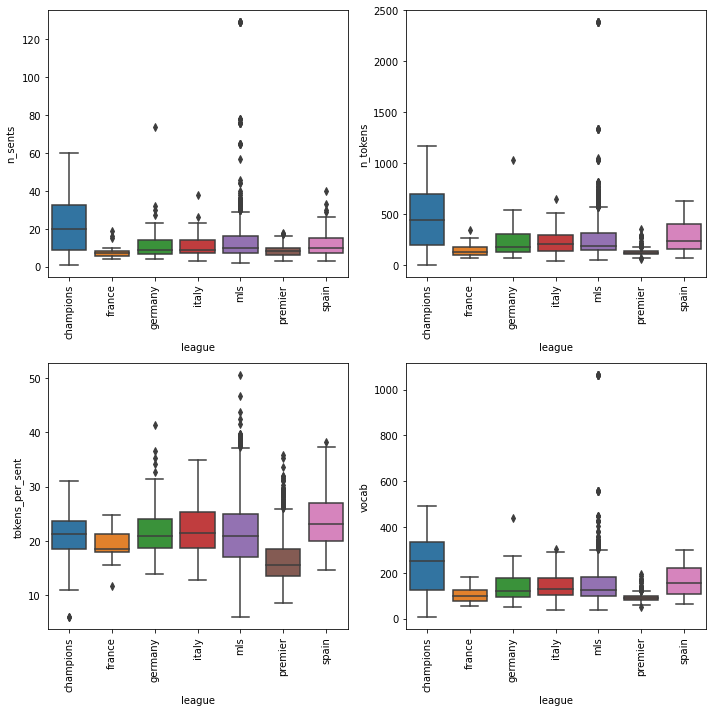

In [65]:
vis_utils.multiple_boxplot(article_df, num_cols, x='league', ncols=2, order=ordered_files)

Si observamos el vocabulario, de nuevo parece que los partidos de la MLS ofrecen una mayor variedad de palabras, en comparación con los demás.

In [66]:
league_article_df

,league,vocab
0,champions,3861
1,france,888
2,germany,2978
3,italy,3655
4,mls,13081
5,premier,4180
6,spain,3977


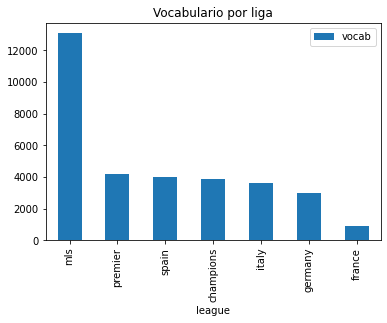

In [67]:
_, ax = plt.subplots()
league_article_df.set_index('league').sort_values('vocab', ascending=False).plot.bar(ax=ax)
plt.title('Vocabulario por liga')
plt.show()

## Comparaciones

In [106]:
columns = ['n_tokens', 'vocab', 'n_sents', 'tokens_per_sent']
col_to_title = {
    'n_sents': 'Número de frases',
    'vocab': 'Vocabulario',
    'tokens_per_sent': 'Palabras por frase',
    'n_tokens': 'Número de palabras'
}

In [141]:
def plot_hist_art_events(events_df, article_df, cols):
    fig, axs = plt.subplots(2,2, figsize=(10,7))
    i=0
    j=0
    for col in columns: 
        ax=axs[i, j]
        #print(f'i={i}, j={j}')
        sns.kdeplot(data=events_df, x=col, ax=ax, label='Eventos')
        sns.kdeplot(data=article_df, x=col, ax=ax, label='Artículos')
        ax.set_title(col_to_title[col])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.legend()
        j+=1
        if j>1:
            j=0
            i=1
    fig.tight_layout()
    plt.show()

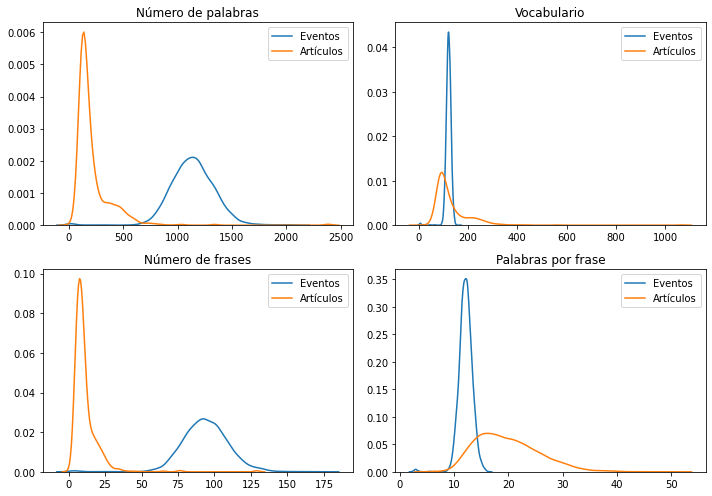

In [142]:
plot_hist_art_events(events_df, article_df, columns)

In [92]:
article_df

,url,n_sents,n_tokens,vocab,json_file,league,tokens_per_sent
0,http://www.premierleague.com/match/38678,6,128,93,premier_league_2018_2019.json,premier,21.333333
1,http://www.premierleague.com/match/38679,8,140,88,premier_league_2018_2019.json,premier,17.500000
2,http://www.premierleague.com/match/38680,7,110,76,premier_league_2018_2019.json,premier,15.714286
3,http://www.premierleague.com/match/38681,6,126,102,premier_league_2018_2019.json,premier,21.000000
4,http://www.premierleague.com/match/38682,5,75,64,premier_league_2018_2019.json,premier,15.000000
...,...,...,...,...,...,...,...
4518,https://www.espn.com/soccer/report?gameId=522712,11,280,175,italian_serie_a_2018_2019.json,italy,25.454545
4519,https://www.espn.com/soccer/report?gameId=522672,8,228,133,italian_serie_a_2018_2019.json,italy,28.500000
4520,https://www.espn.com/soccer/report?gameId=522701,16,318,197,italian_serie_a_2018_2019.json,italy,19.875000
4521,https://www.espn.com/soccer/report?gameId=522667,21,378,208,italian_serie_a_2018_2019.json,italy,18.000000


In [44]:
article_df

,url,n_sents,n_tokens,vocab,json_file,league,tokens_per_sent
0,http://www.premierleague.com/match/38678,6,128,93,premier_league_2018_2019.json,premier,21.333333
1,http://www.premierleague.com/match/38679,8,140,88,premier_league_2018_2019.json,premier,17.500000
2,http://www.premierleague.com/match/38680,7,110,76,premier_league_2018_2019.json,premier,15.714286
3,http://www.premierleague.com/match/38681,6,126,102,premier_league_2018_2019.json,premier,21.000000
4,http://www.premierleague.com/match/38682,5,75,64,premier_league_2018_2019.json,premier,15.000000
...,...,...,...,...,...,...,...
4518,https://www.espn.com/soccer/report?gameId=522712,11,280,175,italian_serie_a_2018_2019.json,italy,25.454545
4519,https://www.espn.com/soccer/report?gameId=522672,8,228,133,italian_serie_a_2018_2019.json,italy,28.500000
4520,https://www.espn.com/soccer/report?gameId=522701,16,318,197,italian_serie_a_2018_2019.json,italy,19.875000
4521,https://www.espn.com/soccer/report?gameId=522667,21,378,208,italian_serie_a_2018_2019.json,italy,18.000000


## Procesamiento básico

Calculamos el vocabulario tanto de los eventos como de los artículos, realizando un procesado básico de texto.

### Quitando signos de puntuación, números y carácteres extraños

Vemos muchas palabras que podemos obviar, ya que no nos van a aportar información.

In [143]:
processor = ArticleTextProcessor()

__Artículos__

In [144]:
%%time
article_vocab = processor.get_vocabulary(text_type='article')

CPU times: user 5.19 ms, sys: 132 µs, total: 5.32 ms
Wall time: 61.9 ms


In [129]:
len(article_vocab)

17929

In [145]:
article_vocab[:20]

[('the', 4373),
 ('a', 4342),
 ('in', 4264),
 ('to', 4258),
 ('on', 4098),
 ('and', 4021),
 ('of', 3946),
 ('at', 3763),
 ('with', 3751),
 ('for', 3683),
 ('from', 3561),
 ('goal', 3358),
 ('first', 3320),
 ('his', 3286),
 ('after', 3246),
 ('but', 3242),
 ('half', 3077),
 ('was', 3054),
 ('as', 2957),
 ('minutes', 2915)]

In [130]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in article_vocab])

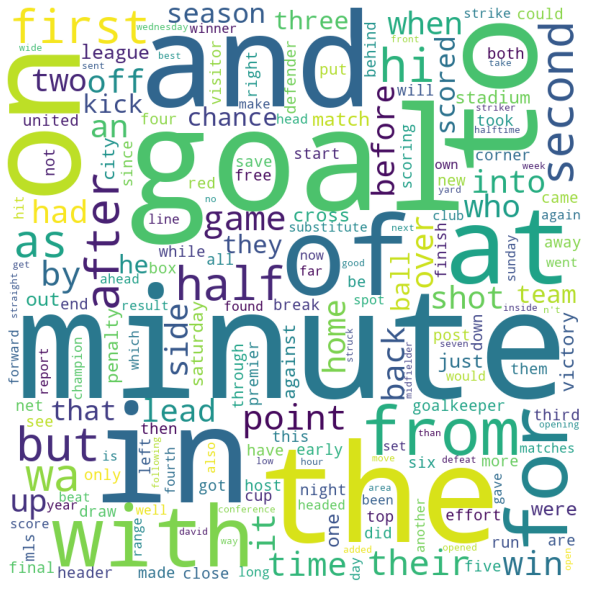

In [136]:
vis_utils.plot_wordcloud(vocab)

__Eventos__

En los eventos, el vocabulario es más reducido, y en ocasiones las frases tienen una estructura muy parecida. Es por ello que encontramos palabras como goal, wins, foul... bastante a menudo

In [154]:
%%time
events_vocab = processor.get_vocabulary(text_type='events')

CPU times: user 1.9 ms, sys: 221 µs, total: 2.12 ms
Wall time: 1.68 ms


In [8]:
len(events_vocab)

7009

In [10]:
events_vocab[:20]

[('goal', 4364),
 ('half', 4364),
 ('to', 4360),
 ('the', 4360),
 ('missed', 4359),
 ('by', 4359),
 ('kick', 4355),
 ('assisted', 4355),
 ('is', 4355),
 ('wins', 4355),
 ('outside', 4355),
 ('attempt', 4355),
 ('free', 4355),
 ('box', 4355),
 ('in', 4355),
 ('a', 4355),
 ('shot', 4355),
 ('footed', 4355),
 ('foul', 4355),
 ('from', 4355)]

In [147]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in events_vocab])

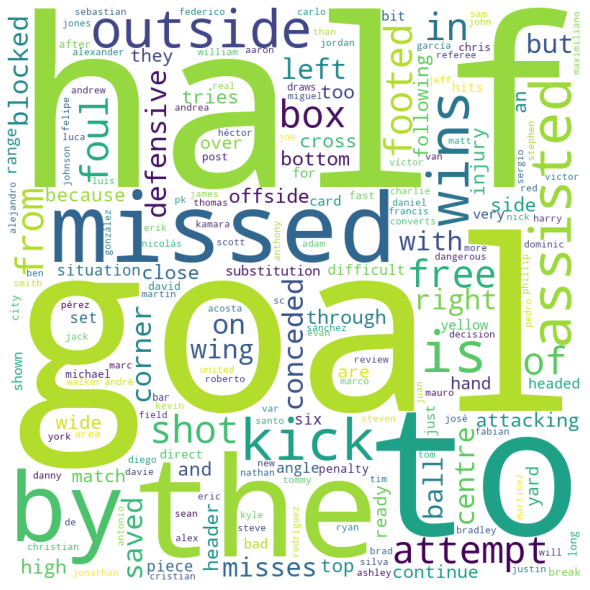

In [148]:
vis_utils.plot_wordcloud(vocab)

__Comparación__

In [155]:
article_vocab_df = pd.DataFrame(article_vocab[:20], columns=['word', 'count']).set_index('word')
events_vocab_df = pd.DataFrame(events_vocab[:20], columns=['word', 'count']).set_index('word')

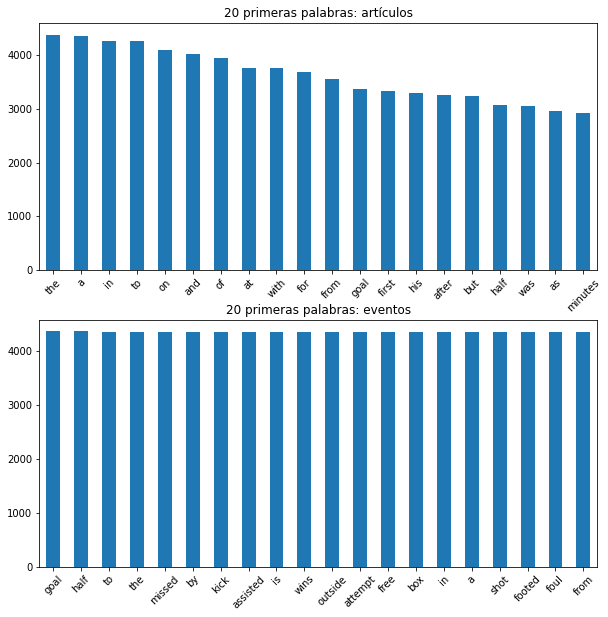

In [173]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
article_vocab_df.plot.bar(ax=axs[0])
axs[0].set_title('20 primeras palabras: artículos')
axs[0].get_legend().remove()
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('')

events_vocab_df.plot.bar(ax=axs[1])
axs[1].set_title('20 primeras palabras: eventos')
axs[1].get_legend().remove()
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('')

plt.show()

### Quitando stopwords y lematizando

Estoy ayudará a quitar ruido, sobretodo en los artículos.

In [174]:
processor = ArticleTextProcessor(lemma=True)

__Artículos__

Se eliminan unas 3000 palabras, y ya empiezan a aparecer cosas que nos pueden ayudar más.

Parece que palabras como minute, half, second... aparecen bastante, lo que puede significar que, al hablar de un momento determinado de un partido,
siempre se especifique la parte o el minuto en el que ocurre.

In [175]:
%%time
article_vocab = processor.get_vocabulary(text_type='article', process=True)

CPU times: user 1.96 ms, sys: 3.41 ms, total: 5.37 ms
Wall time: 74.5 ms


In [108]:
len(article_vocab)

14948

In [106]:
article_vocab[:20]

[('minute', 3824),
 ('goal', 3711),
 ('half', 3082),
 ('second', 2920),
 ('win', 2804),
 ('score', 2603),
 ('lead', 2451),
 ('point', 2427),
 ('time', 2380),
 ('game', 2201),
 ('match', 2184),
 ('home', 2113),
 ('season', 1970),
 ('shot', 1831),
 ('ball', 1763),
 ('kick', 1761),
 ('league', 1755),
 ('cross', 1686),
 ('victory', 1624),
 ('head', 1594)]

In [113]:
vocab = '. '.join(['. '.join(t[0] for i in range(t[1])) for t in article_vocab])

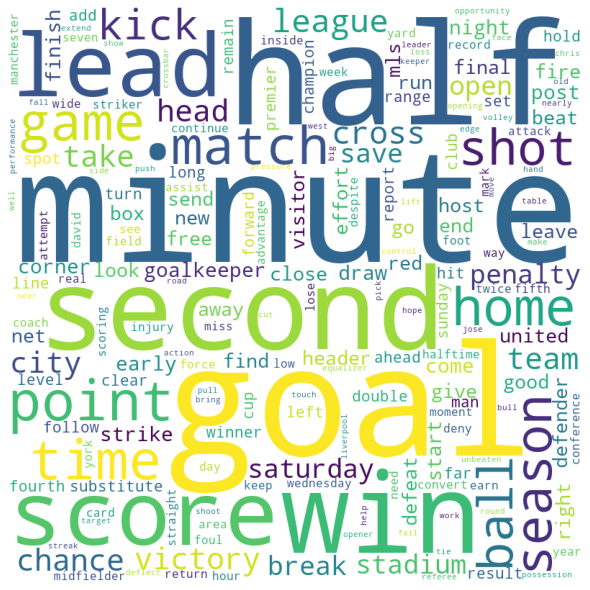

In [123]:
vis_utils.plot_wordcloud(vocab)

__Eventos__

En los eventos prácticamente el vocabulario es el mismo, dando peso a la idea de que están compuestas de frases concisas y con poca variedad de palabras.

Se habla sobretodo de ocasiones, tiros, goles...

In [176]:
%%time
events_vocab = processor.get_vocabulary(text_type='events', process=True)

CPU times: user 0 ns, sys: 2.32 ms, total: 2.32 ms
Wall time: 114 ms


In [11]:
len(events_vocab)

6996

In [151]:
events_vocab[:20]

[('goal', 4364),
 ('half', 4364),
 ('miss', 4359),
 ('kick', 4355),
 ('assist', 4355),
 ('outside', 4355),
 ('attempt', 4355),
 ('free', 4355),
 ('box', 4355),
 ('shot', 4355),
 ('footed', 4355),
 ('win', 4355),
 ('foul', 4355),
 ('right', 4354),
 ('defensive', 4353),
 ('concede', 4353),
 ('corner', 4353),
 ('left', 4353),
 ('centre', 4351),
 ('save', 4345)]

In [154]:
vocab = ' '.join([' '.join(t[0] for i in range(t[1])) for t in events_vocab])

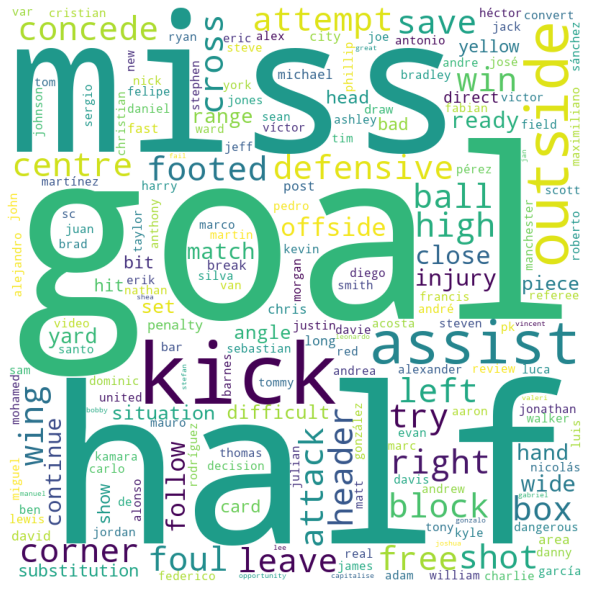

In [155]:
vis_utils.plot_wordcloud(vocab)

__Comparación__

In [177]:
article_vocab_df = pd.DataFrame(article_vocab[:20], columns=['word', 'count']).set_index('word')
events_vocab_df = pd.DataFrame(events_vocab[:20], columns=['word', 'count']).set_index('word')

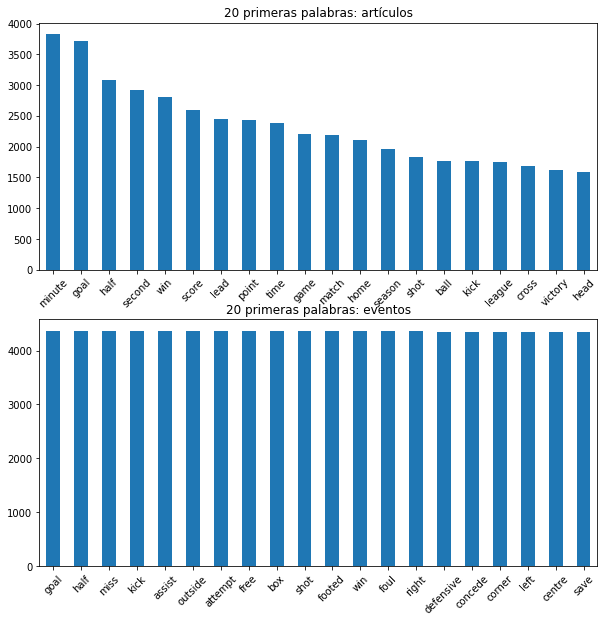

In [178]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
article_vocab_df.plot.bar(ax=axs[0])
axs[0].set_title('20 primeras palabras: artículos')
axs[0].get_legend().remove()
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('')

events_vocab_df.plot.bar(ax=axs[1])
axs[1].set_title('20 primeras palabras: eventos')
axs[1].get_legend().remove()
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('')

plt.show()

## Procesamiento de entidades nombradas

Podemos identificar los distintos equipos y jugadores utilizando los eventos.

In [6]:
processor = ArticleTextProcessor()

In [7]:
all_files = processor.load_json()

In [12]:
tp = TeamPlayers()

In [17]:
%%time
tp.run(all_files)

premier_league_2018_2019.json
0 not considered matches for premier_league_2018_2019.json
             player             team                    season_file
0   Raheem Sterling  Manchester City  premier_league_2018_2019.json
1      Glenn Murray         Brighton  premier_league_2018_2019.json
2    Ilkay Gündogan  Manchester City  premier_league_2018_2019.json
3  Nicolás Otamendi  Manchester City  premier_league_2018_2019.json
4       Pascal Groß         Brighton  premier_league_2018_2019.json
mls_2015_2016.json
https://matchcenter.mlssoccer.com/matchcenter/2015-09-05-montreal-impact-vs-chicago-fire/feed
{'Chicago'}
https://matchcenter.mlssoccer.com/matchcenter/2015-06-16-sporting-kansas-city-vs-saint-louis-fc/feed
set()
https://matchcenter.mlssoccer.com/matchcenter/2015-10-03-orlando-city-sc-vs-montreal-impact/feed
{'Orlando City SC'}
https://matchcenter.mlssoccer.com/matchcenter/2015-06-16-seattle-sounders-fc-vs-portland-timbers/feed
set()
https://matchcenter.mlssoccer.com/matchcenter/

In [17]:
pd_teams_players = tp.read()

In [18]:
pd_teams_players

,player,team,season_file
0,Raheem Sterling,Manchester City,premier_league_2018_2019.json
1,Glenn Murray,Brighton,premier_league_2018_2019.json
2,Ilkay Gündogan,Manchester City,premier_league_2018_2019.json
3,Nicolás Otamendi,Manchester City,premier_league_2018_2019.json
4,Pascal Groß,Brighton,premier_league_2018_2019.json
...,...,...,...
8343,José Mauri,Milan,italian_serie_a_2018_2019.json
8344,Borja Valero,Inter Milan,italian_serie_a_2018_2019.json
8345,Diego Farias,Cagliari,italian_serie_a_2018_2019.json
8346,Alessio Cragno,Milan,italian_serie_a_2018_2019.json
